In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from numpy.polynomial.polynomial import Polynomial

## Functions

In [61]:
def plot_vote_share_vs_population(df, population_col, dem_col, rep_col, degree=2):
    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        data=df,
        x=population_col,
        y=dem_col,
        color='blue',
        label='Democratic Vote Share',
        alpha=0.6
    )
    sns.scatterplot(
        data=df,
        x=population_col,
        y=rep_col,
        color='red',
        label='Republican Vote Share',
        alpha=0.6
    )

    democratic_poly = Polynomial.fit(df[population_col], df[dem_col], deg=degree)
    x_vals = np.linspace(df[population_col].min(), df[population_col].max(), 100)
    plt.plot(x_vals, democratic_poly(x_vals), color='blue', label='Democratic Line')

    republican_poly = Polynomial.fit(df[population_col], df[rep_col], deg=degree)
    plt.plot(x_vals, republican_poly(x_vals), color='red', label='Republican Line')

    # Customize plot
    plt.title('Non-Linear Vote Share vs Population Percentage', fontsize=16)
    plt.xlabel(f'{population_col.replace("_", " ")}', fontsize=14)
    plt.ylabel('Vote Share', fontsize=14)
    plt.legend(title="Vote Share", fontsize=12)
    plt.grid(alpha=0.3)

    # Show plot
    plt.show()

In [59]:
def process_population_vote_share(race_df, election_df, region_type_df, new_pop_col_name, population_col):
    race_df[new_pop_col_name] = (race_df[population_col] / race_df['TOT_POP22']) * 100
    merged_df = pd.merge(election_df, race_df, on='UNIQUE_ID', how='inner')
    merged_df = pd.merge(merged_df, region_type_df, on='UNIQUE_ID', how='inner')
    columns_to_keep = ['UNIQUE_ID', 'Republican_Vote_Share', 'Democratic_Vote_Share', new_pop_col_name, 'region_type']

    merged_df = merged_df[columns_to_keep]
    merged_df = merged_df.dropna(subset=[new_pop_col_name, 'Democratic_Vote_Share', 'Republican_Vote_Share'])
    # remove 0.0 100.0 from White_Pop_Percent
    merged_df = merged_df[(merged_df[new_pop_col_name] != 0.0) & (merged_df[new_pop_col_name] != 100.0)]
    merged_df = merged_df[(merged_df['Republican_Vote_Share'] != 0.0) & (merged_df['Republican_Vote_Share'] != 100.0)]
    merged_df = merged_df[(merged_df['Democratic_Vote_Share'] != 0.0) & (merged_df['Democratic_Vote_Share'] != 100.0)]
    return merged_df

## Import data

In [24]:
sc_election_gov_df = pd.read_json('states/south_carolina/election/sc_election_gov.json')
sc_race_df = pd.read_json('states/south_carolina/demographics/south_carolina_precincts_racial_population.json')
sc_region_type_df = pd.read_json('states/south_carolina/geodata/south_carolina_precincts_region_type.json')

## Main script

In [25]:
print(sc_election_gov_df.head())

                UNIQUE_ID  COUNTYFP     County  Prec_Code         Precinct  \
0  ABBEVILLE_PRECINCT_001         1  ABBEVILLE          1  ABBEVILLE NO. 1   
1  ABBEVILLE_PRECINCT_002         1  ABBEVILLE          2  ABBEVILLE NO. 2   
2  ABBEVILLE_PRECINCT_003         1  ABBEVILLE          3  ABBEVILLE NO. 3   
3  ABBEVILLE_PRECINCT_004         1  ABBEVILLE          4  ABBEVILLE NO. 4   
4  ABBEVILLE_PRECINCT_005         1  ABBEVILLE          5       ANTREVILLE   

   TOT_REP  TOT_DEM  TOT_VOT        LEAN  G22GOVRMCM  G22GOVDCUN  
0      718      257      975  Republican         718         257  
1      224      404      628  Democratic         224         404  
2      336      238      574  Republican         336         238  
3      316      121      437  Republican         316         121  
4      599      123      722  Republican         599         123  


In [26]:
print(sc_race_df.head())

                 UNIQUE_ID          NAME  Prec_Code  CONG_DIST  TOT_POP22  \
0  DORCHESTER_PRECINCT_084  BEECH HILL 2         84          1       3569   
1  DORCHESTER_PRECINCT_072       CYPRESS         72          1       3916   
2  DORCHESTER_PRECINCT_036      DELEMARS         36          1          0   
3  DORCHESTER_PRECINCT_035       GIVHANS         35          1          0   
4  DORCHESTER_PRECINCT_094     GIVHANS 2         94          1       1558   

   NHSP_POP22  HSP_POP22  WHT_NHSP22  BLK_NHSP22  AIA_NHSP22  ASN_NHSP22  \
0        3482         87        3482           0           0           0   
1        3760        156        2661         772           0          19   
2           0          0           0           0           0           0   
3           0          0           0           0           0           0   
4        1541         17         837         456           0           0   

   HPI_NHSP22  OTH_NHSP22  
0           0           0  
1           0         30

In [53]:
sc_election_gov_df['Republican_Vote_Share'] = (sc_election_gov_df['TOT_REP'] / sc_election_gov_df['TOT_VOT']) * 100
sc_election_gov_df['Democratic_Vote_Share'] = (sc_election_gov_df['TOT_DEM'] / sc_election_gov_df['TOT_VOT']) * 100


In [54]:
white_pop_vote_share_df = process_population_vote_share(sc_race_df, sc_election_gov_df, sc_region_type_df, 'White_Pop_Percent', 'WHT_NHSP22')

In [55]:
black_pop_vote_share_df = process_population_vote_share(sc_race_df, sc_election_gov_df, sc_region_type_df, 'Black_Pop_Percent', 'BLK_NHSP22')

In [56]:
asian_pop_vote_share_df = process_population_vote_share(sc_race_df, sc_election_gov_df, sc_region_type_df, 'Asian_Pop_Percent', 'ASN_NHSP22')

In [ ]:
# hispanic_pop_vote_share_df = process_population_vote_share(sc_race_df, sc_election_gov_df, sc_region_type_df, 'Hispanic_Pop_Percent', 'HPI_NHSP22')

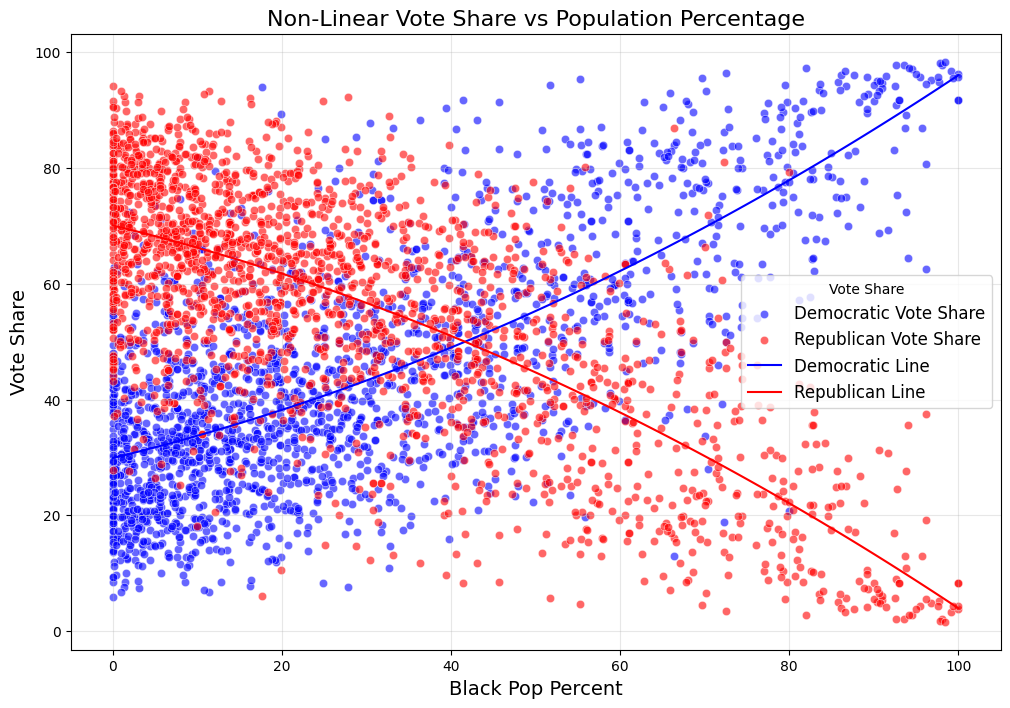

In [62]:
plot_vote_share_vs_population(
    df=black_pop_vote_share_df,
    population_col='Black_Pop_Percent',
    dem_col='Democratic_Vote_Share',
    rep_col='Republican_Vote_Share',
    degree=2
)